In [78]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import seaborn as sns
sns.set()
boston=load_boston()
bos=pd.DataFrame(boston.data)

In [79]:
bos.columns=boston.feature_names
bos['Price']=boston.target


In [80]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [81]:
q = bos['CRIM'].quantile(0.98)
bos_cleaned=bos[bos['CRIM']<q]
print(bos_cleaned.shape)
k = bos_cleaned['ZN'].quantile(0.98)
bos_cleaned=bos_cleaned[bos_cleaned['ZN']<k]
z = bos_cleaned['RAD'].quantile(0.98)
bos_cleaned=bos_cleaned[bos_cleaned['RAD']<z]


(495, 14)


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


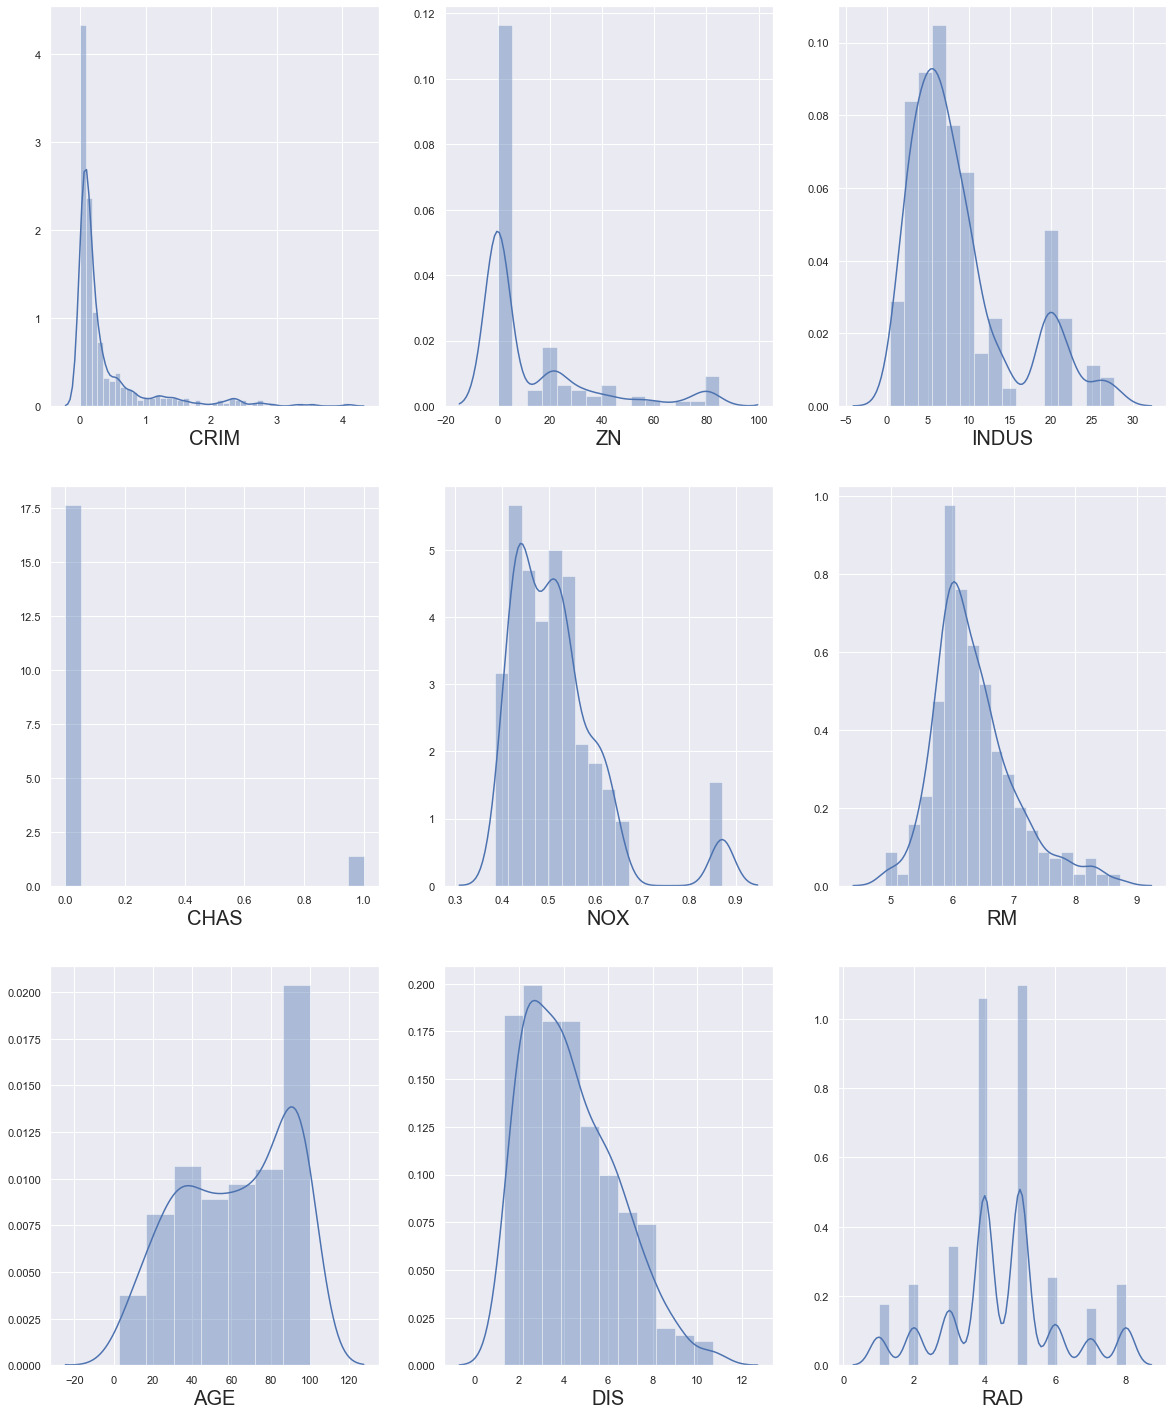

In [82]:
sns.set()
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(bos_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [83]:
X = bos_cleaned.drop(columns = ['Price'])
y = bos_cleaned['Price']

In [84]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [85]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,2.754148,CRIM
1,2.128013,ZN
2,2.729004,INDUS
3,1.081343,CHAS
4,4.773896,NOX
5,2.458796,RM
6,2.718979,AGE
7,3.331594,DIS
8,1.190197,RAD
9,1.611814,TAX


In [86]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [87]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)

LinearRegression()

In [88]:
lin_reg.score(x_train,y_train)


0.8604758377590536

In [89]:
lin_reg.score(x_test,y_test)

0.8338432774137793

In [90]:
def adj_r2(x,y):
    r2 = lin_reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [91]:
adj_r2(x_train,y_train)

0.8534726944805504

In [92]:
adj_r2(x_test,y_test)

0.8057908437303913

In [94]:
import pickle
filename = 'lin_reg_model.pickle'
pickle.dump(lin_reg, open(filename, 'wb'))